In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[]

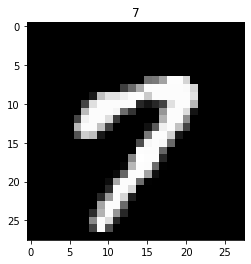

In [3]:
plt.title(y_train[15])
plt.imshow(x_train[15], cmap='gray')
plt.plot()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print(f"x_train shape : {x_train.shape}")
print(f"Training samples : {x_train.shape[0]}")
print(f"Testing samples : {x_test.shape[0]}")

x_train shape : (60000, 28, 28, 1)
Training samples : 60000
Testing samples : 10000


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [6]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train, y_train,
    batch_size=30, epochs=2,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.1536 - accuracy: 0.9526 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 2/2
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0304 - val_accuracy: 0.9896


In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss : {score[0]}")
print(f"Test accuracy : {score[1]}")

Test loss : 0.03042257908655156
Test accuracy : 0.9896000027656555


In [8]:
model.save("model.h5")

In [9]:
def predict(img):
    img = img.reshape(1, 28, 28, 1)
    res = np.argmax(model.predict(img), axis=-1)
    return res

In [10]:
print(predict(x_test[45]))

[5]


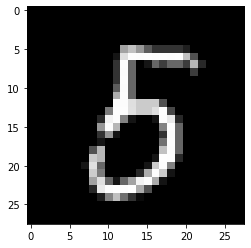

In [11]:
plt.imshow(x_test[45].reshape(28, 28), cmap='gray')